<a href="https://colab.research.google.com/github/Jatinnagar777/demo/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

#Datasets

In [82]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [83]:
#droping unrelivent columns
df = df.drop(columns=['id', 'Unnamed: 32'], axis=1)

In [84]:
#Finding the number of rows and columns in datasets
df.shape

(569, 31)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Encoding

In [86]:
df['diagnosis'] = (df['diagnosis']=='B').astype(int)

In [87]:
#value distribution
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

#Correlation

In [88]:
df.corr()['diagnosis'].abs().sort_values()

symmetry_se                0.006522
texture_se                 0.008303
fractal_dimension_mean     0.012838
smoothness_se              0.067016
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

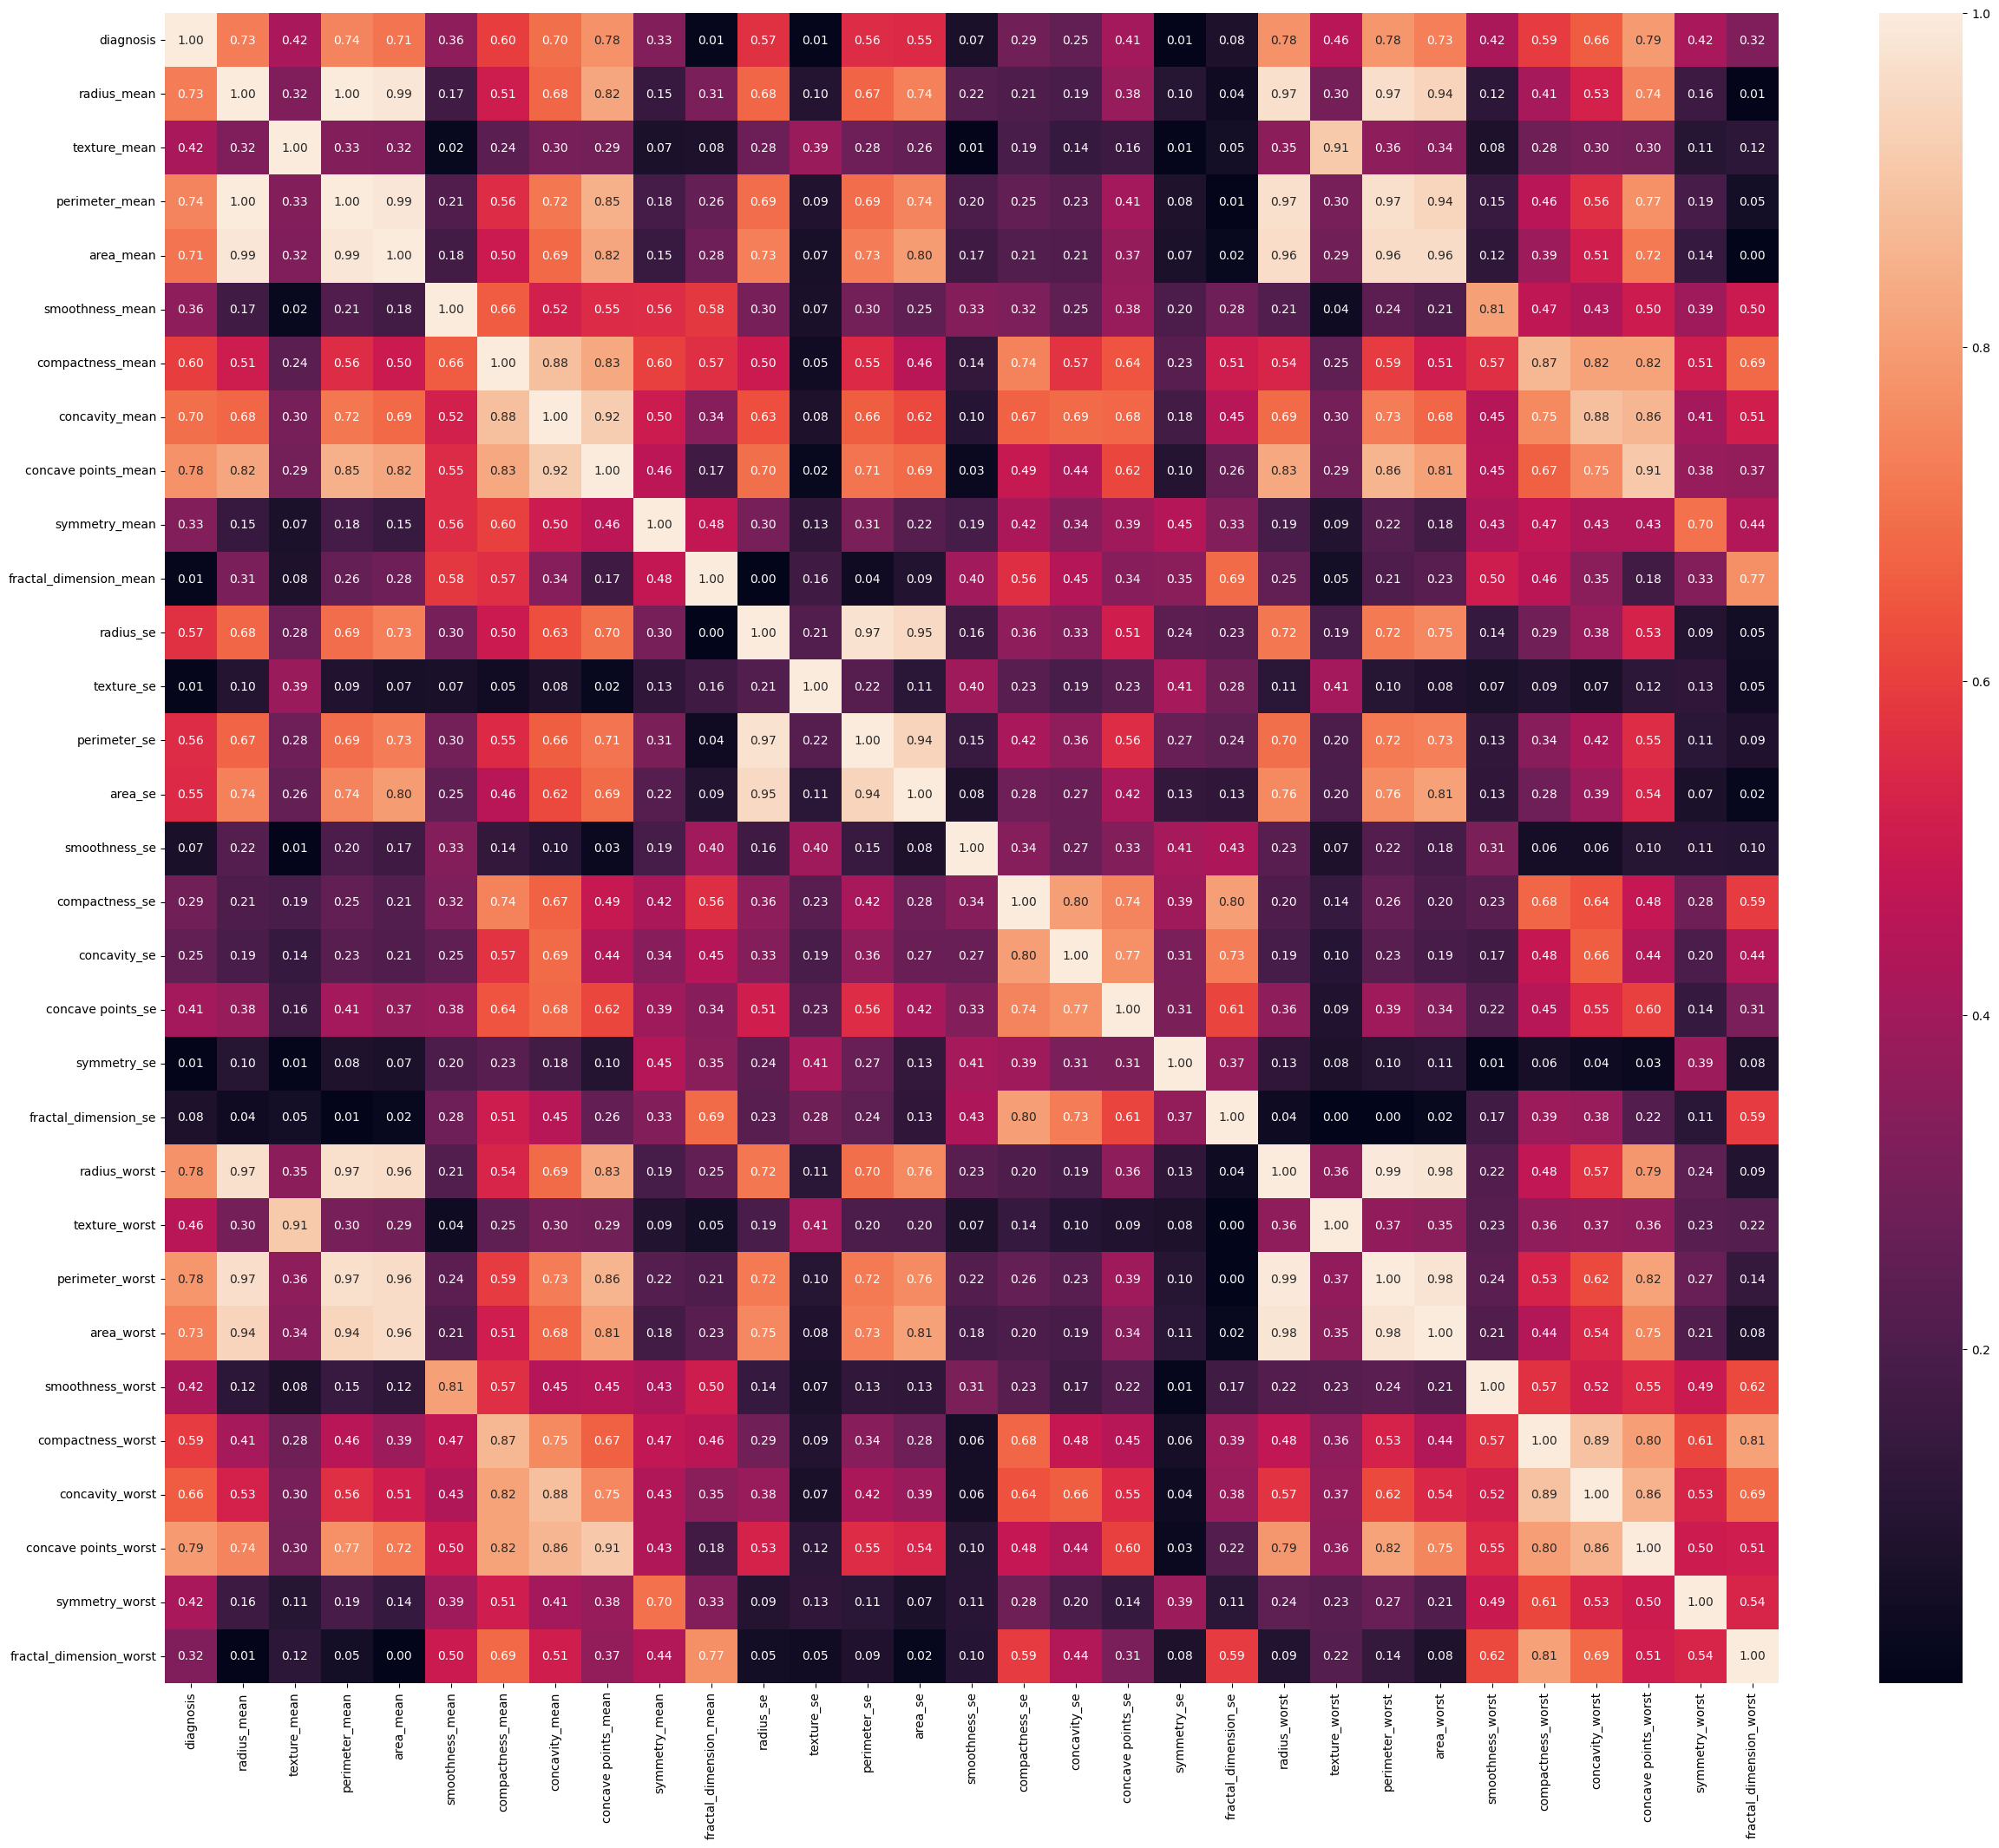

In [89]:
plt.figure(figsize=(30, 25))
sns.heatmap(df.corr().abs(), annot=True, fmt='.2f')
plt.show()

#Data visualization

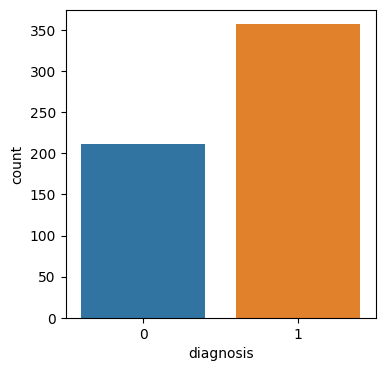

In [90]:
plt.figure(figsize=(4, 4))
sns.countplot(x=df['diagnosis'], data=df)
plt.show()

In [93]:
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']

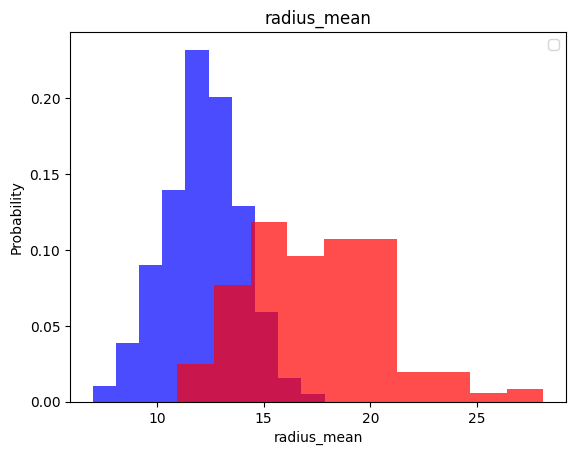

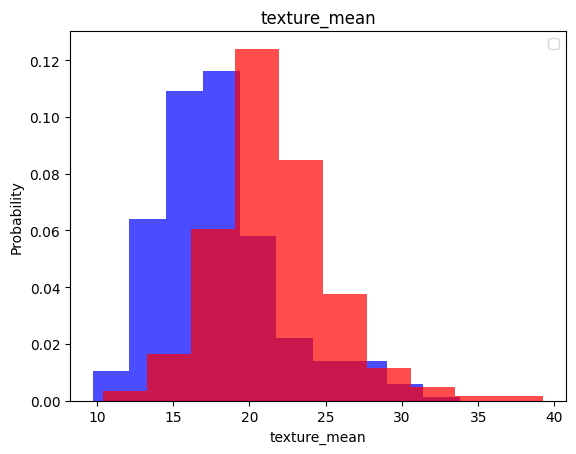

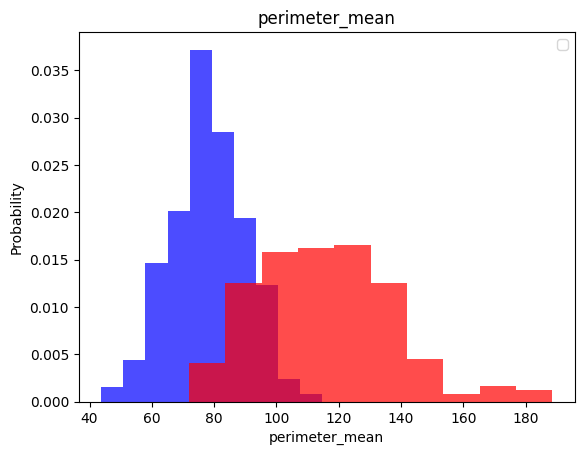

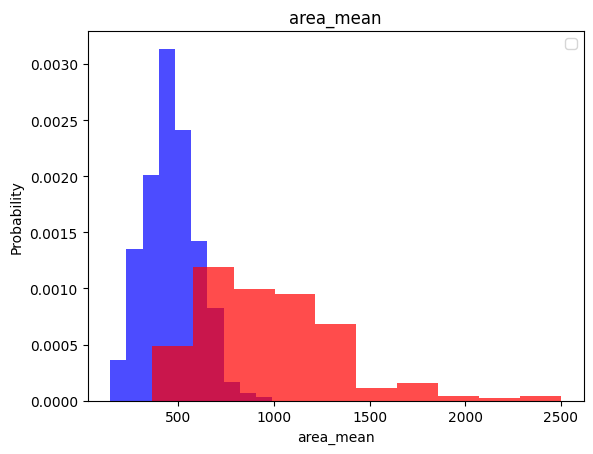

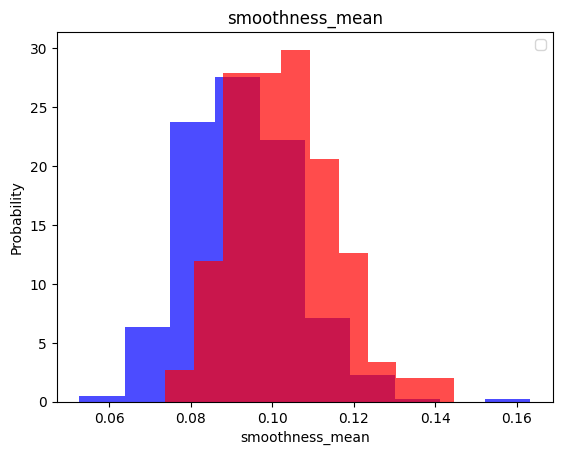

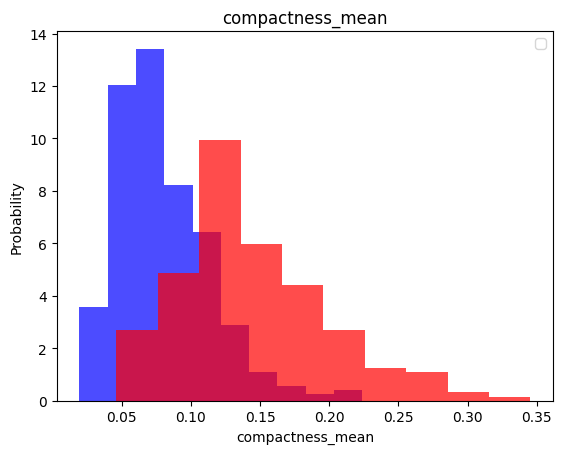

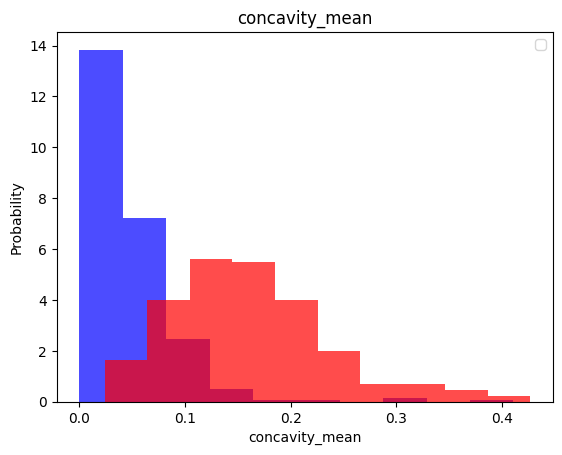

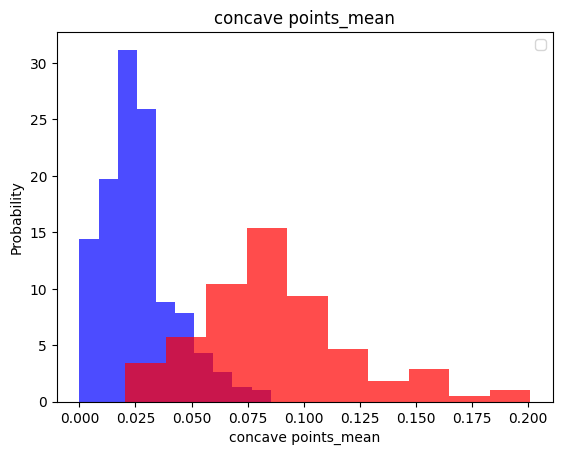

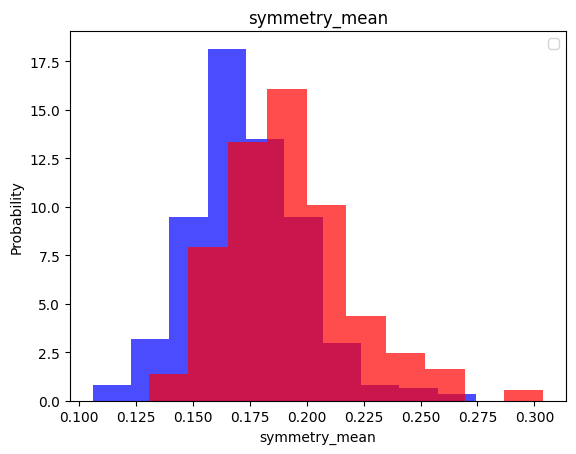

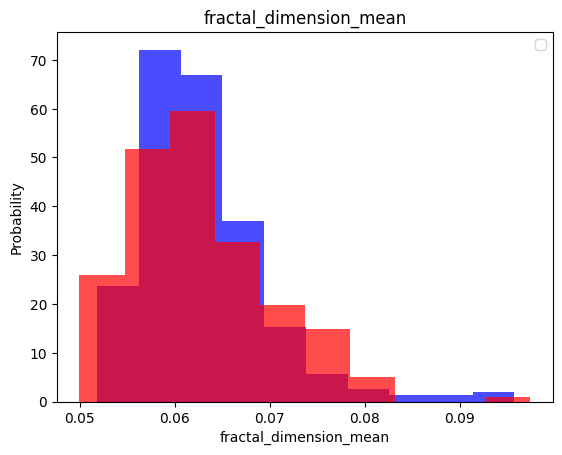

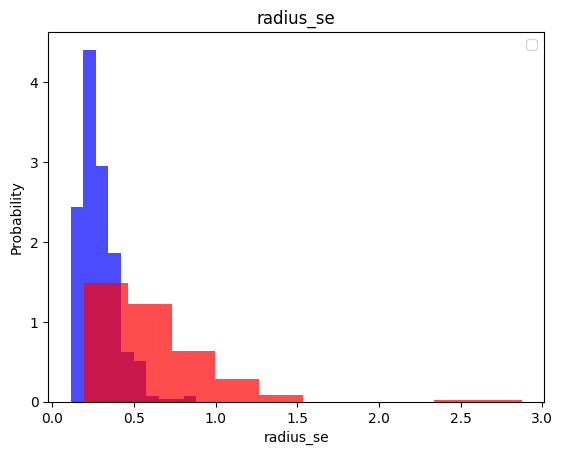

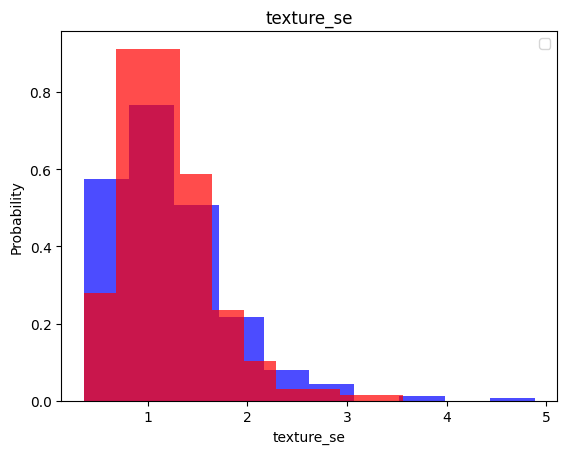

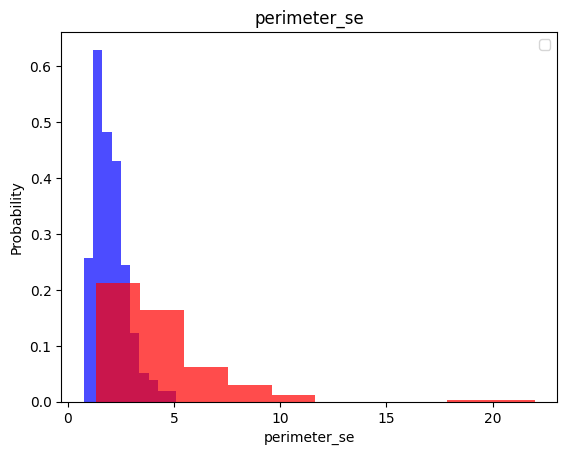

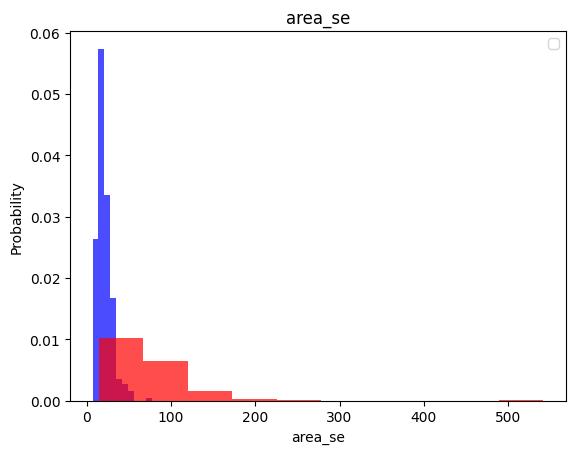

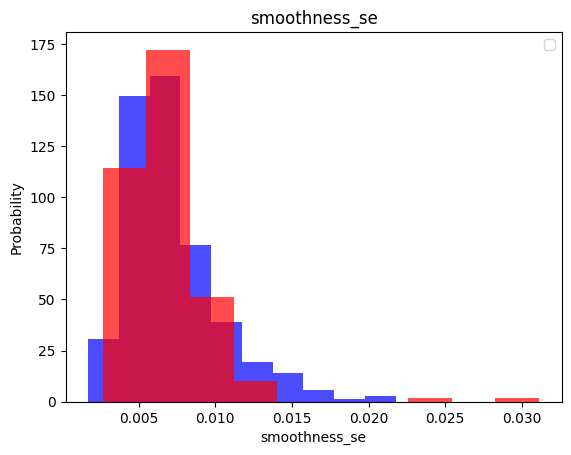

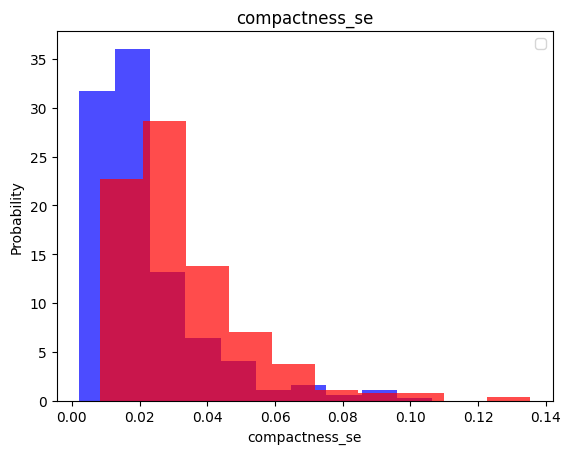

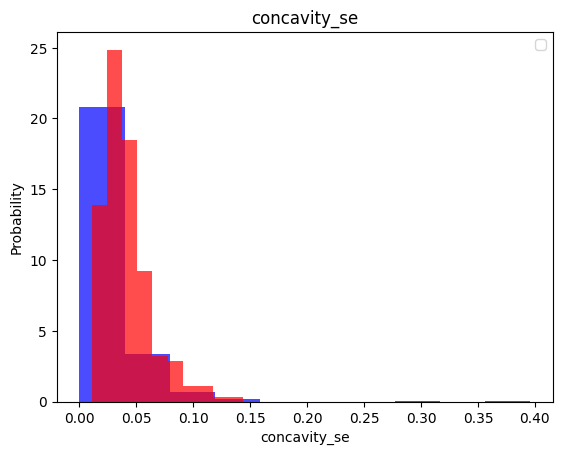

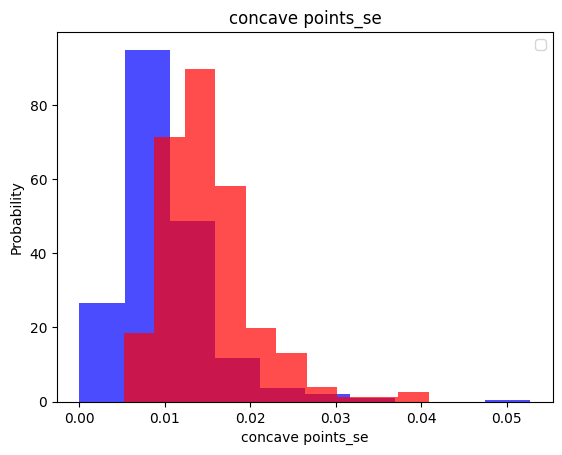

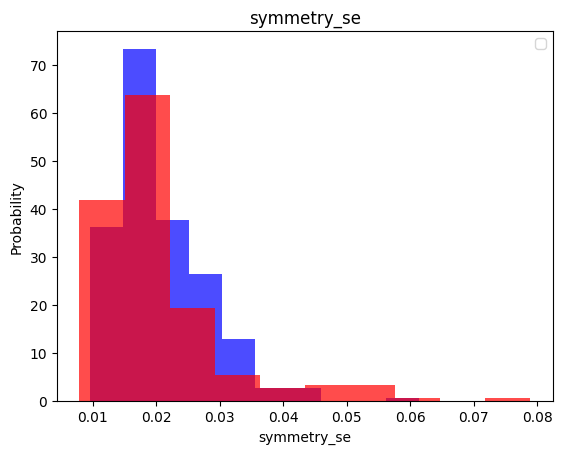

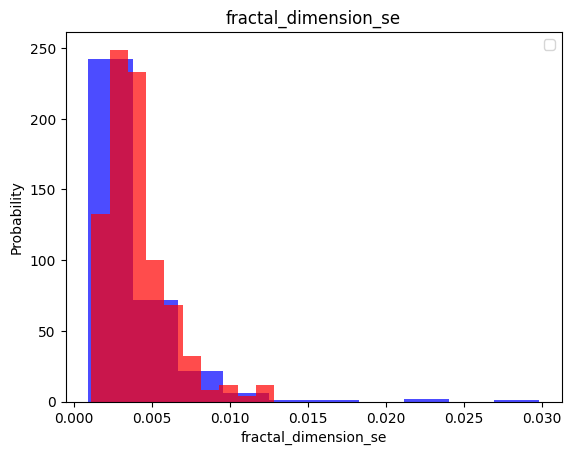

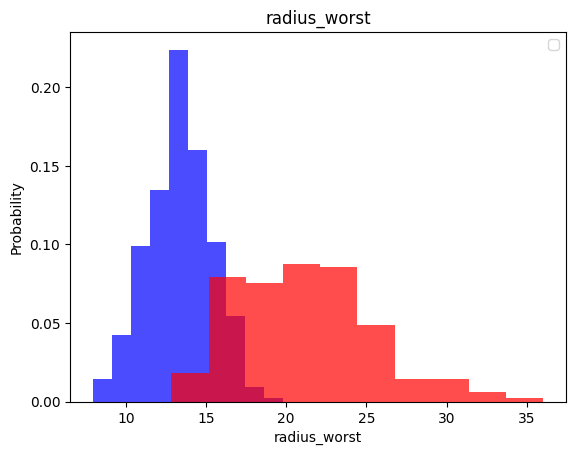

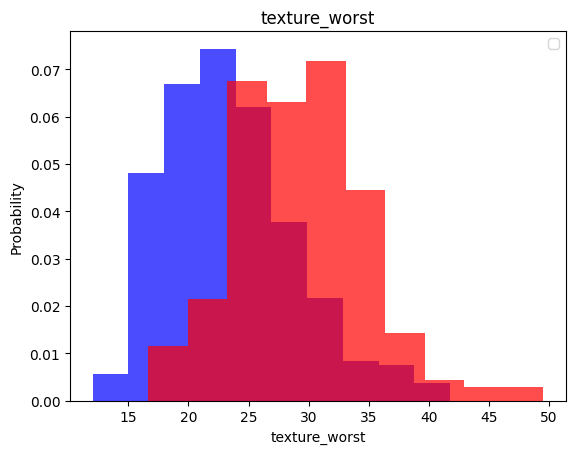

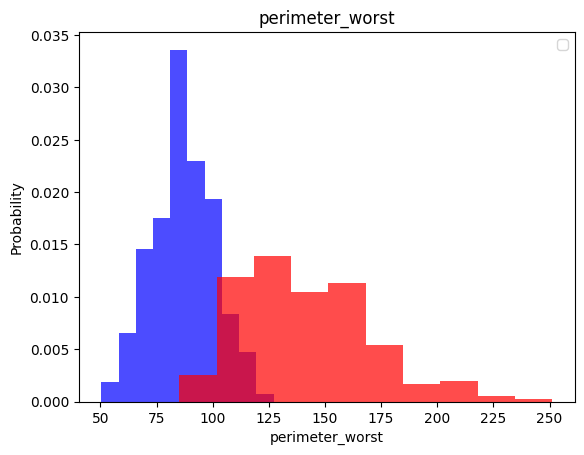

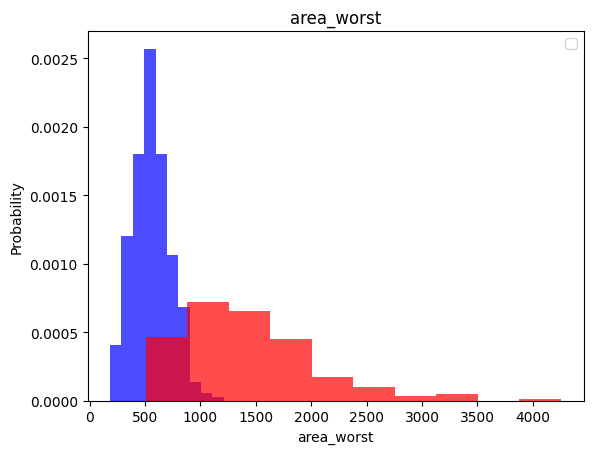

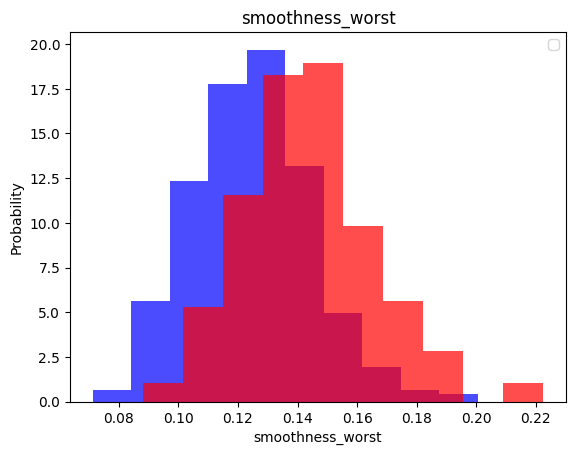

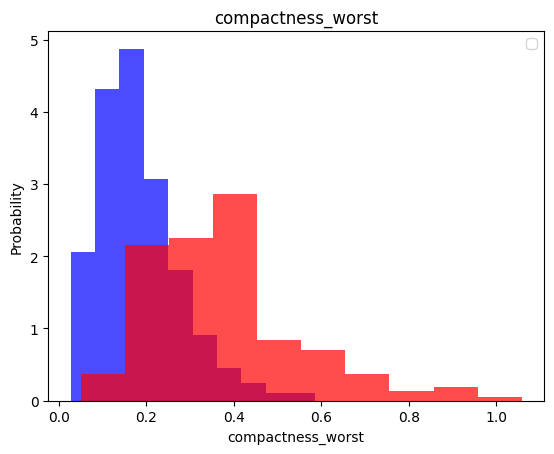

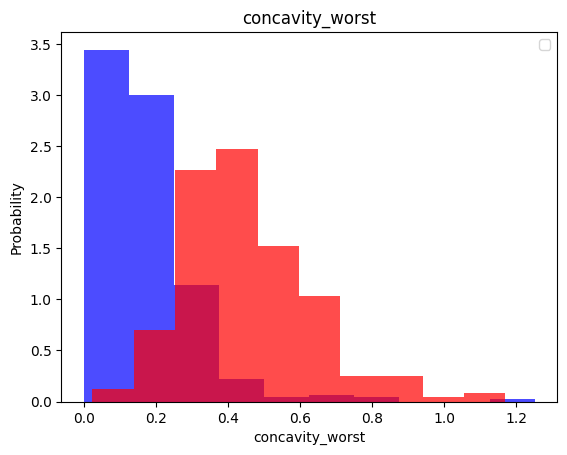

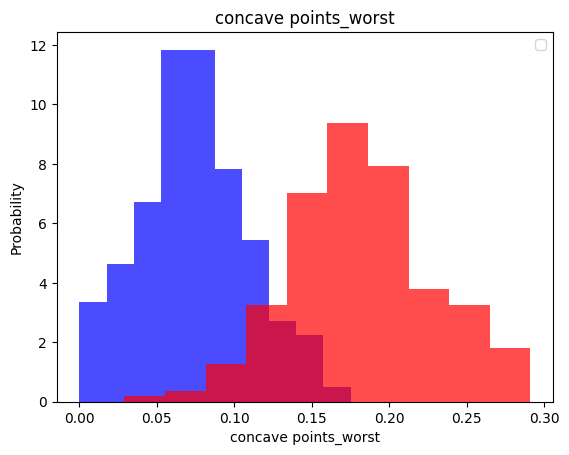

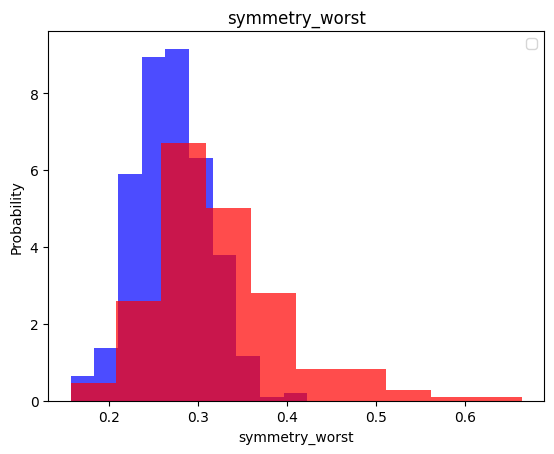

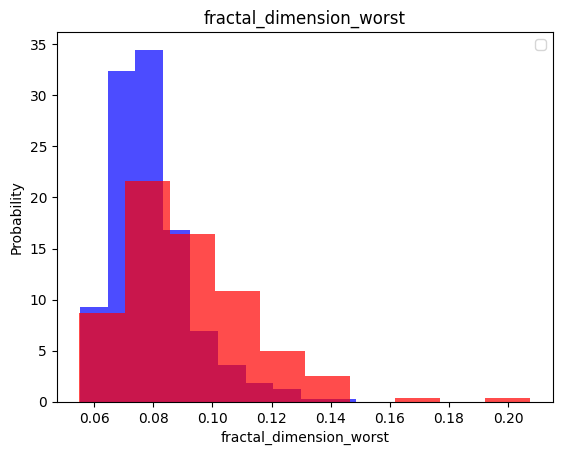

In [94]:
for column in x.columns:
  plt.hist(df[df['diagnosis']==1][column], color='blue', alpha=0.7, density=True)
  plt.hist(df[df['diagnosis']==0][column], color='red', alpha=0.7, density=True)
  plt.title(column)
  plt.xlabel(column)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

#Normalization

In [95]:
def scale_dataset(dataframe,oversample=False):
  x = df.drop('diagnosis', axis=1).values
  y = df['diagnosis'].values
  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  if oversample:
    over = RandomOverSampler()
    x, y = over.fit_resample(x, y)
  data = np.hstack((x, np.reshape(y, (-1, 1))))
  return data, x, y

#Train/Test/Validation datasets

In [96]:
train, test, valid = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

In [97]:
train, x_train, y_train = scale_dataset(train, oversample=True)
test, x_test, y_test = scale_dataset(test, oversample=False)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)

#KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [100]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [101]:
y_pred = knn.predict(x_test)

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       212
           1       0.99      0.98      0.98       357

    accuracy                           0.98       569
   macro avg       0.97      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569

